Trabalho de Redes Complexas

In [593]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np

# Trabalho de Redes complexas

Esse trabalho consiste em coletar 4 redes de diferentes repositórios indicados pelo Professor. O objetivo é extrair métricas estudadas em sala de aula e aplicar em dados reais.
Os dados são disponibilizados em csv, foi utilizado para o tratamento da tabela e criação dos grafos a ferramenta PANDAS junto com a ferramenta networkx

In [624]:
GraphList = []

##  Rede 1:  Big Allied and Dangerous

Rede coletada: https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/bigalliedanddangerousbaad

### Leitura das tabelas

In [882]:
df_main = pd.read_csv("T1/BAAD/CSV/BAAD.csv")
df_main.rename(columns={"Unnamed: 0":"grupo_terrorista"},inplace=True)
df_attr = pd.read_csv("T1/BAAD/CSV/BAAD_ATTR.csv")
#Para a construção da rede, iremos utilizar 4 atributos: 
#ContainRelig, ContainEthno,PureRelig, PureEthno,ReligEthno
df_attr.rename(columns={"Unnamed: 0":"grupo_terrorista"},inplace=True)
df_attr = df_attr.filter(['grupo_terrorista','ContainRelig','ContainEthno','PureRelig','PureEthno','LeftNoReligEthno','fatalities19982005'])
df_relation = pd.read_csv("T1/BAAD/CSV/BAAD_1M.csv")
df_relation.rename(columns={"Unnamed: 0":"grupo_terrorista"},inplace=True)

In [883]:
df_main.sample(3)

,grupo_terrorista,Afghanistan,Algeria,Angola,Argentina,Bangladesh,Bolivia,Chad,Chile,China,...,Switzerland,Tajikistan,Thailand,Turkey,USA,Uganda,United_Kingdom,Uzbekistan,Venezuela,Yemen
311,Revolutionary_Violence_Group(RVG),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,Black_Star,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,Padanian_Armed_Separatist_Phalanx_(FASP),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [884]:
df_attr.sample(3)

,grupo_terrorista,ContainRelig,ContainEthno,PureRelig,PureEthno,LeftNoReligEthno,fatalities19982005
152,Hawks_of_Thrace,0,1,0,0,0,0
183,Jamatul_Mujahedin,1,0,1,0,0,23
8,Abu_al-Abbas,1,0,1,0,0,0


In [885]:
df_relation.sample(3)

,grupo_terrorista,15-May,1920_Revolution_Brigades,21-Jun,Abdurajak_Janjalani_Brigade(AJB),Abu_Bakr_al-Siddiq_Fundamentalist_Brigades,Abu_Hafs_al-Masri_Brigade,Abu_Nayaf_al-Afgani,Abu_Sayyaf_Group(ASG),Abu_al-Abbas,...,al-Haramayn_Brigades,al-Intiqami_al-Pakistani,al-Madina,al-Mansoorain,al-Nawaz,al-Qaeda,al-Qaeda_Organization_Land_Two_Rivers,al-Qaeda_in_the_Arabian_Penninsula(AQAP),al-Quds_Brigades,al-Umar_Mujahideen
387,al-Mansoorain,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
128,Five_C's,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,Brigades_of_the_Victorious_Lion_of_God,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Construção do Grafo

Foram criadas algumas funções que auxiliam na construção do grafo a partir do dataframe.

In [886]:
def add_nodes(df):
    lista = df.values.tolist()
    for i in (lista):
#         print("Adicionou o Nó: <{},{}> ".format(str(i[0]),str(i[1])) )
        G.add_node(i[0],weight=i[1])
def add_edge(df):
    lista = df.values.tolist()
    for idx in range(len(lista)):
        grupo_terrorista = lista[idx]
        
        for i in range( 1,len(grupo_terrorista) ):
            if(grupo_terrorista[i] == 1):
                print("Adicionou aresta: <{},{}> ".format(grupo_terrorista[0],df.columns[i]) )
                if( df.columns[i]!= grupo_terrorista[0]):
                    if(G.has_edge(df.columns[i],grupo_terrorista[0]) ==False):
                        G.add_edge(grupo_terrorista[0],df.columns[i])
def add_edge_re(df,tp):
    lista = df.values.tolist()
    
    for idx in range(len(lista)):
        grupo_terrorista = lista[idx]
        for i in range( 1,len(grupo_terrorista) ):
            if(grupo_terrorista[i] == 1):
                if(tp == 0):
                    if(G.has_edge( grupo_terrorista[0],'religiao'  ) == False):
                        print("Adicionou aresta: <{},{}> ".format(grupo_terrorista[0],'religiao') )
                        G.add_edge(grupo_terrorista[0],'religiao')
                elif(tp==1):
                    if(G.has_edge( grupo_terrorista[0],'etnico'  ) == False):
                        print("Adicionou aresta: <{},{}> ".format(grupo_terrorista[0],'etnico') )
                        G.add_edge(grupo_terrorista[0],'etnico')
                else:
#                     LeftNoReligEthno
                    if(G.has_edge( grupo_terrorista[0],'ideologiaEsquerda') == False):
                        print("Adicionou aresta: <{},{}> ".format(grupo_terrorista[0],'ideologiaEsquerda') )
                        G.add_edge(grupo_terrorista[0],'ideologiaEsquerda')


In [887]:
G = nx.Graph()
GraphList.append(G)
#Cria os nós com a quantidade de mortes associadas aquela organização terrorista
add_nodes(df_attr.filter(['grupo_terrorista','fatalities19982005']))
#Cria um grafo não direcionado com as arestas 
add_edge(df_main)
add_edge_re(df_attr.filter(['grupo_terrorista','ContainRelig']),0 )
add_edge_re(df_attr.filter(['grupo_terrorista','PureRelig']),0 )
add_edge_re(df_attr.filter(['grupo_terrorista','ContainEthno']),1 )
add_edge_re(df_attr.filter(['grupo_terrorista','PureEthno']),1 )
add_edge_re(df_attr.filter(['grupo_terrorista','LeftNoReligEthno']),2 )
add_edge(df_relation)
G = G.to_undirected()

Adicionou aresta: <15-May,Greece> 
Adicionou aresta: <1920_Revolution_Brigades,Iraq> 
Adicionou aresta: <21-Jun,Greece> 
Adicionou aresta: <Abdurajak_Janjalani_Brigade(AJB),Philippines> 
Adicionou aresta: <Abu_Bakr_al-Siddiq_Fundamentalist_Brigades,Iraq> 
Adicionou aresta: <Abu_Hafs_al-Masri_Brigade,United_Kingdom> 
Adicionou aresta: <Abu_Nayaf_al-Afgani,Spain> 
Adicionou aresta: <Abu_Sayyaf_Group(ASG),Philippines> 
Adicionou aresta: <Abu_al-Abbas,Iraq> 
Adicionou aresta: <Abu_al-Rish_Brigades,Israel> 
Adicionou aresta: <Accolta_Nazinuale_Corsa,France> 
Adicionou aresta: <Achik_National_Volunteer_Council(ANVC),India> 
Adicionou aresta: <Action_Committee_of_Winegrowers,France> 
Adicionou aresta: <Action_Directe,France> 
Adicionou aresta: <Action_Group_Extreme_Beate,Denmark> 
Adicionou aresta: <Aden_Abyan_Islamic_Army(AAIA),Yemen> 
Adicionou aresta: <Adivasi_Cobra_Force(ACF),India> 
Adicionou aresta: <Akhil_Krantikari,Nepal> 
Adicionou aresta: <Al-Bara_bin_Malek_Brigades,Iraq> 
Adicionou

Adicionou aresta: <Anti-Olympic_Flame,Chaotic_Attack_Front> 
Adicionou aresta: <Anti-Olympic_Flame,Children_of_Fire> 
Adicionou aresta: <Anti-Olympic_Flame,Commando_Anarchist_Group> 
Adicionou aresta: <Anti-Olympic_Flame,Communists_Liberation_Faction> 
Adicionou aresta: <Anti-Olympic_Flame,Conscientious_Arsonists_(CA)> 
Adicionou aresta: <Anti-Olympic_Flame,Consciously_Enraged> 
Adicionou aresta: <Anti-Olympic_Flame,Enraged_Proletarians> 
Adicionou aresta: <Anti-Olympic_Flame,Fighters_for_Freedom> 
Adicionou aresta: <Anti-Olympic_Flame,Fighting_Ecologist_Activism> 
Adicionou aresta: <Anti-Olympic_Flame,Fighting_Guerillas_of_May> 
Adicionou aresta: <Anti-Olympic_Flame,Fires_of_Hell> 
Adicionou aresta: <Anti-Olympic_Flame,Friendship_Society> 
Adicionou aresta: <Anti-Olympic_Flame,Group_for_Social_Resistance_to_the_State_Mechanism> 
Adicionou aresta: <Anti-Olympic_Flame,Group_of_Carlo_Giuliani> 
Adicionou aresta: <Anti-Olympic_Flame,Hawks_of_Thrace> 
Adicionou aresta: <Anti-Olympic_Flame,

Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Red_Line> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Brigades> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Liberation_Action> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Memory> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Nuclei> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Organization_17_November_(RO-N17)> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Struggle> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Subversive_Faction-Commando_Unibomber> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Torch-Bearing_Run> 
Adicionou aresta: <Group_for_Social_Resistance_to_the_State_Mechanism,Revolutionary_Violenc

Adicionou aresta: <Popular_Liberation_Army,United_Self-Defense_Forces_of_Colombia_(AUC)> 
Adicionou aresta: <Popular_Resistance,15-May> 
Adicionou aresta: <Popular_Resistance,21-Jun> 
Adicionou aresta: <Popular_Resistance,Anarchist_Attack_Teams> 
Adicionou aresta: <Popular_Resistance,Anarchist_Faction> 
Adicionou aresta: <Popular_Resistance,Anarchist_Faction_for_Subversion> 
Adicionou aresta: <Popular_Resistance,Anarchist_Liberation_Brigade> 
Adicionou aresta: <Popular_Resistance,Anarchist_Street_Patrol> 
Adicionou aresta: <Popular_Resistance,Anarchist_Struggle> 
Adicionou aresta: <Popular_Resistance,Anarchists'_Attack_Group> 
Adicionou aresta: <Popular_Resistance,Anarkhiki_Omadha_20_Louli> 
Adicionou aresta: <Popular_Resistance,Anti-Authority_Erotic_Cells> 
Adicionou aresta: <Popular_Resistance,Anti-Mainstream_Self_Determination_Faction> 
Adicionou aresta: <Popular_Resistance,Anti-Olympic_Flame> 
Adicionou aresta: <Popular_Resistance,Anti-Power_Struggle> 
Adicionou aresta: <Popular_Re

Adicionou aresta: <al-Aarifeen,al-Nawaz> 
Adicionou aresta: <al-Aarifeen,al-Qaeda> 
Adicionou aresta: <al-Aarifeen,al-Umar_Mujahideen> 
Adicionou aresta: <al-Ahwal_Brigades,1920_Revolution_Brigades> 
Adicionou aresta: <al-Ahwal_Brigades,Abu_Bakr_al-Siddiq_Fundamentalist_Brigades> 
Adicionou aresta: <al-Ahwal_Brigades,Abu_al-Abbas> 
Adicionou aresta: <al-Ahwal_Brigades,Al-Bara_bin_Malek_Brigades> 
Adicionou aresta: <al-Ahwal_Brigades,Ali_Bin_Abu_Talib_Jihad_Organization> 
Adicionou aresta: <al-Ahwal_Brigades,Ansar_al-Islam> 
Adicionou aresta: <al-Ahwal_Brigades,Ansar_al-Jihad> 
Adicionou aresta: <al-Ahwal_Brigades,Ansar_al-Sunnah_Army> 
Adicionou aresta: <al-Ahwal_Brigades,Army_of_the_Followers_of_Sunni_Islam> 
Adicionou aresta: <al-Ahwal_Brigades,Brigades_of_Imam_al-Hassan_al-Basri> 
Adicionou aresta: <al-Ahwal_Brigades,Brigades_of_Martyr_Ahmed_Yassin> 
Adicionou aresta: <al-Ahwal_Brigades,Brigades_of_the_Victorious_Lion_of_God> 
Adicionou aresta: <al-Ahwal_Brigades,Divine_Wrath_Brigad

### Criação do arquivo utilizado para a ferramenta Gelphi

A ferramenta de visualização do grafo tem uma entrada padrão.
Essa parte do código transforma a partir do dataframe uma tabela possível de se utilizar nesta ferramenta

#### Criação dos nós para a ferramenta Gelphi

In [888]:
df = pd.DataFrame(dict(G.nodes(data='weight')).items(),columns=['label','deaths'])

In [889]:
df['deaths'].fillna(0,inplace=True)

In [890]:
df.sample(2)

,label,deaths
193,Kach,0.0
64,Autonomous_Decorators,0.0


In [891]:
#Crio um ID, necessário para a ferramenta Gelphi
temp_df = pd.DataFrame({'label': df.label.unique(), 'Id':range(len(df.label.sort_values().unique()))})
df = df.merge(temp_df, on='label', how='left')

In [892]:
df.to_csv("nos_terroristas.csv",index=False)

In [893]:
df.sample(2)

,label,deaths,Id
430,China,0.0,430
69,Basque_Fatherland_and_Freedom_(ETA),52.0,69


#### Criação das arestas para a ferramenta Gelphi

In [894]:
df_edges = pd.DataFrame(list(G.edges),columns=['label_s','label_x'])

In [895]:
df_ed1 = pd.merge(df_edges,df,left_on=['label_s'],right_on=['label'],how='inner')
df_ed1.rename(columns={"Id":"origem"},inplace=True)
df_ed2 = pd.merge(df_ed1.drop(columns=['label','deaths']),df,left_on=['label_x'],right_on=['label'],how='inner',suffixes = ['__x','__y'])
df_ed2.rename(columns={"Id":"destino"},inplace=True)


In [896]:
df_ed2.rename(columns={"origem":"Source","destino":"Target"},inplace=True)

In [897]:
df_ed2.head(2)

,label_s,label_x,Source,label,deaths,Target
0,15-May,Greece,0,Greece,0.0,394
1,21-Jun,Greece,2,Greece,0.0,394


In [898]:
cols = ['Source','Target']
df_ed2[cols].to_csv("edgesterroristas.csv",index=False)

### Métricas

#### Métricas gerais

Quantidade de nós e arestas

In [899]:
print("Quantidade de nós:", len(G.nodes))
print("Quantidade de arestas:", len(G.edges))

Quantidade de nós: 462
Quantidade de arestas: 5300


Quantidade de componentes conexas

In [900]:
from networkx.algorithms.components import number_connected_components
print(number_connected_components(G))

8


In [901]:
# G.degree()

Grau médio dos vértices

Métricas relativas ao grau dos vértices

In [902]:
degrees = []
for n, d in G.degree():
    degrees.append(d)

from statistics import  *
number_of_nodes = G.number_of_nodes()
maxi =max(d for n, d in G.degree()) 
mini =min(d for n, d in G.degree()) 
median =median(d for n, d in G.degree()) 

std = stdev(degrees) 
mean = sum(degrees) / float(number_of_nodes)
print("#nodes: ",number_of_nodes)
print("max: ",maxi )
print("min: ",mini )
print("mean: ",mean )
print("median: ",median )
print("std: ",std )


#nodes:  462
max:  152
min:  1
mean:  22.943722943722943
median:  12.0
std:  25.121334055366923


Text(0, 0.5, 'Grau do Vértice')

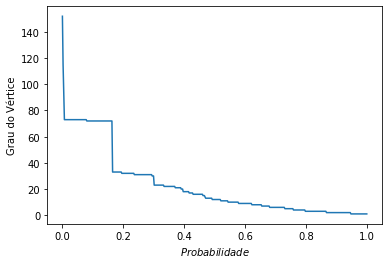

In [903]:
data = list(dict(G.degree()).values())
data_sorted = sorted(data)
cdf = 1. * np.arange(len(data)) / (len(data) - 1)
# plot the sorted data:
ccdf = 1-cdf
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ccdf, data_sorted)
ax1.set_xlabel('$Probabilidade$')
ax1.set_ylabel('Grau do Vértice')

# ax2 = fig.add_subplot(122)
# ax2.plot(data_sorted, p)
# ax2.set_xlabel('$x$')
# ax2.set_ylabel('$P$')

labels:  ['1', '2', '3', '4', '5', '6', '7', '8', '9']


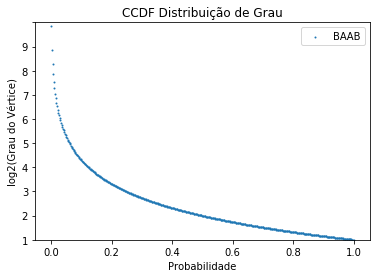

In [904]:
import math
data = list(dict(G.degree()).values())
data_sorted = sorted(data)
cdf = 1. * np.arange(len(data)) / (len(data) - 1)
# plot the sorted data:
ccdf = 1-cdf
# encontra o logaritmo CCDF and ylabels
logcdfy = [-math.log2(1.0 - (float(idx) / len(data_sorted)))
           for idx in range(len(data_sorted))]

# encontra o logaritmo da probabilidade and xlabels
logcdfx = [-math.log2(1.0 - (float(idx) / len(ccdf)))
           for idx in range(len(ccdf))]

labels = ['1', '2', '3', '4', '5', '6', '7', '8','9']
labels = labels[0:math.ceil(max(logcdfy))+1]
print("labels: ", labels)
# plot the logarithmic CDF
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(ccdf, logcdfy, s=4, linewidths=0,label="BAAB")

axes.set_ylim(0, math.ceil(max(logcdfy)))
axes.set_yticklabels(labels)
plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.show()


Métricas relativas a densidade da rede

In [648]:
S = [G.subgraph(c).copy()for c in nx.connected_components(G)]
# nx.draw(S[0], node_color='r', edge_color='b',with_labels=True)

                                                     Densidade 
![image.png](densidade.png)

In [649]:
#Para cada componente conexa se calcula a densidade
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max(density(s),maxi)
    mini = min(density(s),mini)
    densities.append(density(s))
densities = sorted(densities)
if(len(densities)%2 == 0):
    median = densities[int(len(densities)/2)]+densities[int(len(densities)/2 + 1)]/2
else:
    median = densities[ int(len(densities)/2 )]
try:
    std = stdev(densities) 
except:
    std = 0
mean = density(G)
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  1.0
Min:  0.053297727616264425
mean:  0.049769464086166906
median:  1.5
standart deviation:  0.33470979828362674


In [650]:
from networkx.classes.function import *
density(G)

0.049769464086166906

Descobrindo quem são os vértices que são pontes

In [651]:
#Péssima ideia plotar
from networkx.algorithms.bridges import *
S = [G.subgraph(c).copy()for c in nx.connected_components(G)]
for b in list(nx.bridges(G)):
    for s in S:
        if(s.has_edge(b[0],b[1])):
            plt.clf()
#             nx.draw(s, node_color='r', edge_color='b',with_labels=True)
            plt.tight_layout()
#             plt.savefig("graph_bridge_{}_{}.png".format(b[0],b[1]), format="PNG")

    

<Figure size 432x288 with 0 Axes>

#### Métricas de centralidade

In [652]:
from networkx.algorithms.centrality import *

#####  Grau

In [653]:
S = list({k: v for k, v in sorted(degree_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.3297180043383948
Min:  0.0021691973969631237
mean:  0.04976946408616705
median:  0.039045553145336226
standart deviation:  0.054493132441143004


##### Betwenness

In [654]:
S = list({k: v for k, v in sorted(betweenness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)


Max:  0.46671831155144544
Min:  0.0
mean:  0.004442649368613717
median:  0.0017849292864327237
standart deviation:  0.028229415995229677


#####  Closeness

In [905]:
S = list({k: v for k, v in sorted(closeness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.4618874349823898
Min:  0.0021691973969631237
mean:  0.30010560961669536
median:  0.4787020592870979
standart deviation:  0.0734913072745374


##### Eigen Vector

In [656]:
S = list({k: v for k, v in sorted(eigenvector_centrality(G,max_iter=150).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.11728545995026374
Min:  5.4821688641627305e-22
mean:  0.018747997006892544
median:  0.00017349555163077477
standart deviation:  0.04262566784998658


##### PageRank

In [657]:
from networkx.algorithms.link_analysis.pagerank_alg import *
S = list({k: v for k, v in sorted(pagerank(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)



Max:  0.023824251167531757
Min:  0.0006537202857233011
mean:  0.002164502164502166
median:  0.0032253061037546948
standart deviation:  0.0015276090060517022


## Rede 2:   Mexican drug traffic

Dados temporais no período de 1990 até 2010 dos Municipios e Estados utilizados por carteis de Droga no México.

Dados coletados: http://www.michelecoscia.com/?page_id=1032

### Leitura das tabelas

In [658]:
df = pd.read_csv("T1/CosciaRios2012_DataBase.csv")

In [659]:
df.sample(2)

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
38751,24033,24,1996,0,0,0,0,0,0,0,0,0,0
36959,21192,21,2010,0,0,0,0,0,0,0,0,0,0


### Construção do Grafo no Networkx

In [660]:
def add_edge(df):
    G = nx.Graph()
    lista = df.values.tolist()
    
    for idx in range(len(lista)):
        code = lista[idx][0]
        state = lista[idx][1]
        
        for i in range( 3,len(lista[idx]) ):
            if(lista[idx][i] == 1):
                print("Adicionou aresta: <{},{}> ".format(code,df.columns[i]) )
                print("Adicionou aresta: <{},{}> ".format(state,df.columns[i]) )
                G.add_edge(code,df.columns[i])
                G.add_edge(state,df.columns[i])
    return G
def build_graph(df,year):
    g = df[df['Year']==year]
    return add_edge(g)

In [661]:
graph_by_year = []
for year in range(df['Year'].min(),df['Year'].max()+1):
    graph_by_year.append(build_graph(df,year))


Adicionou aresta: <25010,Sinaloa> 
Adicionou aresta: <25,Sinaloa> 
Adicionou aresta: <25017,Sinaloa> 
Adicionou aresta: <25,Sinaloa> 
Adicionou aresta: <26030,Sinaloa> 
Adicionou aresta: <26,Sinaloa> 
Adicionou aresta: <28014,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28032,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28041,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <2002,Tijuana> 
Adicionou aresta: <2,Tijuana> 
Adicionou aresta: <2002,Zetas> 
Adicionou aresta: <2,Zetas> 
Adicionou aresta: <2004,Tijuana> 
Adicionou aresta: <2,Tijuana> 
Adicionou aresta: <2005,Tijuana> 
Adicionou aresta: <2,Tijuana> 
Adicionou aresta: <25011,Zetas> 
Adicionou aresta: <25,Zetas> 
Adicionou aresta: <28027,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <2001,Sinaloa> 
Adicionou aresta: <2,Sinaloa> 
Adicionou aresta: <2002,Tijuana> 
Adicionou aresta: <2,Tijuana> 
Adicionou aresta: <2002,Zetas> 
Adicionou aresta: <2,Zetas> 
Adicionou aresta: <5023,Tijuana> 
Adi

Adicionou aresta: <1001,Tijuana> 
Adicionou aresta: <1,Tijuana> 
Adicionou aresta: <2001,Tijuana> 
Adicionou aresta: <2,Tijuana> 
Adicionou aresta: <2004,Juarez> 
Adicionou aresta: <2,Juarez> 
Adicionou aresta: <2004,Tijuana> 
Adicionou aresta: <2,Tijuana> 
Adicionou aresta: <4002,Golfo> 
Adicionou aresta: <4,Golfo> 
Adicionou aresta: <4002,Zetas> 
Adicionou aresta: <4,Zetas> 
Adicionou aresta: <5010,Golfo> 
Adicionou aresta: <5,Golfo> 
Adicionou aresta: <5010,Juarez> 
Adicionou aresta: <5,Juarez> 
Adicionou aresta: <5012,Golfo> 
Adicionou aresta: <5,Golfo> 
Adicionou aresta: <5012,Juarez> 
Adicionou aresta: <5,Juarez> 
Adicionou aresta: <5015,Golfo> 
Adicionou aresta: <5,Golfo> 
Adicionou aresta: <5015,Juarez> 
Adicionou aresta: <5,Juarez> 
Adicionou aresta: <5025,Tijuana> 
Adicionou aresta: <5,Tijuana> 
Adicionou aresta: <5030,Juarez> 
Adicionou aresta: <5,Juarez> 
Adicionou aresta: <5035,Juarez> 
Adicionou aresta: <5,Juarez> 
Adicionou aresta: <6002,Beltran_Leyva> 
Adicionou aresta:

Adicionou aresta: <28002,Sinaloa> 
Adicionou aresta: <28,Sinaloa> 
Adicionou aresta: <28003,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28003,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <28007,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28007,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <28011,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28011,Sinaloa> 
Adicionou aresta: <28,Sinaloa> 
Adicionou aresta: <28014,Beltran_Leyva> 
Adicionou aresta: <28,Beltran_Leyva> 
Adicionou aresta: <28014,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28018,Tijuana> 
Adicionou aresta: <28,Tijuana> 
Adicionou aresta: <28022,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28022,Sinaloa> 
Adicionou aresta: <28,Sinaloa> 
Adicionou aresta: <28023,Beltran_Leyva> 
Adicionou aresta: <28,Beltran_Leyva> 
Adicionou aresta: <28023,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <28024,Juarez> 
Adicionou aresta: <28,Juarez> 
Adici

Adicionou aresta: <9,Zetas> 
Adicionou aresta: <10002,Sinaloa> 
Adicionou aresta: <10,Sinaloa> 
Adicionou aresta: <10005,Juarez> 
Adicionou aresta: <10,Juarez> 
Adicionou aresta: <10005,Otros> 
Adicionou aresta: <10,Otros> 
Adicionou aresta: <10006,Golfo> 
Adicionou aresta: <10,Golfo> 
Adicionou aresta: <10006,Juarez> 
Adicionou aresta: <10,Juarez> 
Adicionou aresta: <10007,Juarez> 
Adicionou aresta: <10,Juarez> 
Adicionou aresta: <10007,Sinaloa> 
Adicionou aresta: <10,Sinaloa> 
Adicionou aresta: <10012,Juarez> 
Adicionou aresta: <10,Juarez> 
Adicionou aresta: <10012,Zetas> 
Adicionou aresta: <10,Zetas> 
Adicionou aresta: <10017,Juarez> 
Adicionou aresta: <10,Juarez> 
Adicionou aresta: <10017,Sinaloa> 
Adicionou aresta: <10,Sinaloa> 
Adicionou aresta: <10023,Sinaloa> 
Adicionou aresta: <10,Sinaloa> 
Adicionou aresta: <10032,Sinaloa> 
Adicionou aresta: <10,Sinaloa> 
Adicionou aresta: <10034,Sinaloa> 
Adicionou aresta: <10,Sinaloa> 
Adicionou aresta: <10038,Tijuana> 
Adicionou aresta: <1

Adicionou aresta: <31,Golfo> 
Adicionou aresta: <31093,Beltran_Leyva> 
Adicionou aresta: <31,Beltran_Leyva> 
Adicionou aresta: <31093,Sinaloa> 
Adicionou aresta: <31,Sinaloa> 
Adicionou aresta: <32002,Golfo> 
Adicionou aresta: <32,Golfo> 
Adicionou aresta: <32005,Golfo> 
Adicionou aresta: <32,Golfo> 
Adicionou aresta: <32008,Zetas> 
Adicionou aresta: <32,Zetas> 
Adicionou aresta: <32009,Zetas> 
Adicionou aresta: <32,Zetas> 
Adicionou aresta: <32010,Golfo> 
Adicionou aresta: <32,Golfo> 
Adicionou aresta: <32010,Zetas> 
Adicionou aresta: <32,Zetas> 
Adicionou aresta: <32014,Juarez> 
Adicionou aresta: <32,Juarez> 
Adicionou aresta: <32020,Golfo> 
Adicionou aresta: <32,Golfo> 
Adicionou aresta: <32020,Zetas> 
Adicionou aresta: <32,Zetas> 
Adicionou aresta: <32024,Zetas> 
Adicionou aresta: <32,Zetas> 
Adicionou aresta: <32032,Juarez> 
Adicionou aresta: <32,Juarez> 
Adicionou aresta: <32032,Sinaloa> 
Adicionou aresta: <32,Sinaloa> 
Adicionou aresta: <32042,Zetas> 
Adicionou aresta: <32,Zetas

Adicionou aresta: <20413,Golfo> 
Adicionou aresta: <20,Golfo> 
Adicionou aresta: <20413,Zetas> 
Adicionou aresta: <20,Zetas> 
Adicionou aresta: <20515,Golfo> 
Adicionou aresta: <20,Golfo> 
Adicionou aresta: <20515,Sinaloa> 
Adicionou aresta: <20,Sinaloa> 
Adicionou aresta: <20551,Zetas> 
Adicionou aresta: <20,Zetas> 
Adicionou aresta: <21004,Zetas> 
Adicionou aresta: <21,Zetas> 
Adicionou aresta: <21015,Golfo> 
Adicionou aresta: <21,Golfo> 
Adicionou aresta: <21019,Familia> 
Adicionou aresta: <21,Familia> 
Adicionou aresta: <21019,Golfo> 
Adicionou aresta: <21,Golfo> 
Adicionou aresta: <21019,Zetas> 
Adicionou aresta: <21,Zetas> 
Adicionou aresta: <21063,Zetas> 
Adicionou aresta: <21,Zetas> 
Adicionou aresta: <21064,Zetas> 
Adicionou aresta: <21,Zetas> 
Adicionou aresta: <21065,Juarez> 
Adicionou aresta: <21,Juarez> 
Adicionou aresta: <21066,Beltran_Leyva> 
Adicionou aresta: <21,Beltran_Leyva> 
Adicionou aresta: <21066,Golfo> 
Adicionou aresta: <21,Golfo> 
Adicionou aresta: <21066,Zeta

Adicionou aresta: <3003,Tijuana> 
Adicionou aresta: <3,Tijuana> 
Adicionou aresta: <3003,Otros> 
Adicionou aresta: <3,Otros> 
Adicionou aresta: <3008,Tijuana> 
Adicionou aresta: <3,Tijuana> 
Adicionou aresta: <3008,Otros> 
Adicionou aresta: <3,Otros> 
Adicionou aresta: <4002,Golfo> 
Adicionou aresta: <4,Golfo> 
Adicionou aresta: <4002,Zetas> 
Adicionou aresta: <4,Zetas> 
Adicionou aresta: <4003,Golfo> 
Adicionou aresta: <4,Golfo> 
Adicionou aresta: <4003,Zetas> 
Adicionou aresta: <4,Zetas> 
Adicionou aresta: <4009,Beltran_Leyva> 
Adicionou aresta: <4,Beltran_Leyva> 
Adicionou aresta: <4009,Golfo> 
Adicionou aresta: <4,Golfo> 
Adicionou aresta: <4009,Zetas> 
Adicionou aresta: <4,Zetas> 
Adicionou aresta: <5002,Juarez> 
Adicionou aresta: <5,Juarez> 
Adicionou aresta: <5002,Zetas> 
Adicionou aresta: <5,Zetas> 
Adicionou aresta: <5004,Golfo> 
Adicionou aresta: <5,Golfo> 
Adicionou aresta: <5004,Zetas> 
Adicionou aresta: <5,Zetas> 
Adicionou aresta: <5008,Golfo> 
Adicionou aresta: <5,Golfo>

Adicionou aresta: <19007,Zetas> 
Adicionou aresta: <19,Zetas> 
Adicionou aresta: <19009,Zetas> 
Adicionou aresta: <19,Zetas> 
Adicionou aresta: <19010,Beltran_Leyva> 
Adicionou aresta: <19,Beltran_Leyva> 
Adicionou aresta: <19010,Golfo> 
Adicionou aresta: <19,Golfo> 
Adicionou aresta: <19011,Golfo> 
Adicionou aresta: <19,Golfo> 
Adicionou aresta: <19011,Zetas> 
Adicionou aresta: <19,Zetas> 
Adicionou aresta: <19012,Golfo> 
Adicionou aresta: <19,Golfo> 
Adicionou aresta: <19012,Zetas> 
Adicionou aresta: <19,Zetas> 
Adicionou aresta: <19013,Beltran_Leyva> 
Adicionou aresta: <19,Beltran_Leyva> 
Adicionou aresta: <19013,Golfo> 
Adicionou aresta: <19,Golfo> 
Adicionou aresta: <19014,Golfo> 
Adicionou aresta: <19,Golfo> 
Adicionou aresta: <19014,Zetas> 
Adicionou aresta: <19,Zetas> 
Adicionou aresta: <19015,Golfo> 
Adicionou aresta: <19,Golfo> 
Adicionou aresta: <19017,Golfo> 
Adicionou aresta: <19,Golfo> 
Adicionou aresta: <19017,Zetas> 
Adicionou aresta: <19,Zetas> 
Adicionou aresta: <1901

Adicionou aresta: <30031,Golfo> 
Adicionou aresta: <30,Golfo> 
Adicionou aresta: <30031,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30032,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30039,Golfo> 
Adicionou aresta: <30,Golfo> 
Adicionou aresta: <30039,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30043,Golfo> 
Adicionou aresta: <30,Golfo> 
Adicionou aresta: <30043,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30044,Golfo> 
Adicionou aresta: <30,Golfo> 
Adicionou aresta: <30044,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30045,Golfo> 
Adicionou aresta: <30,Golfo> 
Adicionou aresta: <30048,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30053,Golfo> 
Adicionou aresta: <30,Golfo> 
Adicionou aresta: <30053,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30065,Beltran_Leyva> 
Adicionou aresta: <30,Beltran_Leyva> 
Adicionou aresta: <30065,Golfo> 
Adicionou aresta: <30,Golfo> 
Adicionou aresta: <30065,Zetas> 
Adicio

Adicionou aresta: <16099,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16101,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16102,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16102,Golfo> 
Adicionou aresta: <16,Golfo> 
Adicionou aresta: <16102,Zetas> 
Adicionou aresta: <16,Zetas> 
Adicionou aresta: <16102,Otros> 
Adicionou aresta: <16,Otros> 
Adicionou aresta: <16103,Zetas> 
Adicionou aresta: <16,Zetas> 
Adicionou aresta: <16105,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16107,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16107,Zetas> 
Adicionou aresta: <16,Zetas> 
Adicionou aresta: <16108,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16110,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16112,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <16113,Familia> 
Adicionou aresta: <16,Familia> 
Adicionou aresta: <17001,Beltran_Leyva> 
Adicionou aresta: <17,Beltran_Leyva> 
Adi

Adicionou aresta: <28038,Otros> 
Adicionou aresta: <28,Otros> 
Adicionou aresta: <28039,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <28040,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28040,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <28041,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28041,Sinaloa> 
Adicionou aresta: <28,Sinaloa> 
Adicionou aresta: <28041,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <28041,Otros> 
Adicionou aresta: <28,Otros> 
Adicionou aresta: <28042,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28042,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <28043,Beltran_Leyva> 
Adicionou aresta: <28,Beltran_Leyva> 
Adicionou aresta: <28043,Golfo> 
Adicionou aresta: <28,Golfo> 
Adicionou aresta: <28043,Zetas> 
Adicionou aresta: <28,Zetas> 
Adicionou aresta: <29005,Zetas> 
Adicionou aresta: <29,Zetas> 
Adicionou aresta: <30002,Zetas> 
Adicionou aresta: <30,Zetas> 
Adicionou aresta: <30003,Golfo> 
Ad

### Características específicas da Rede formada ao longo dos anos

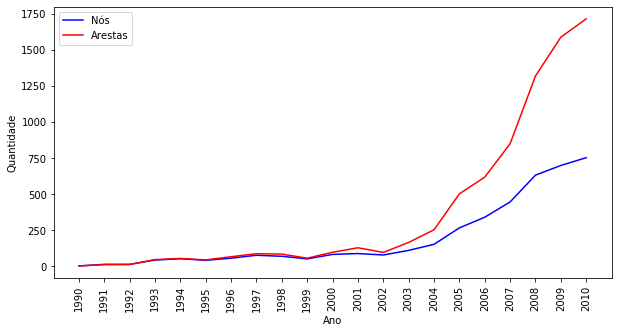

In [662]:

ano = 1990
x_ = []
nodes_ = []
edges_ = []
for graph in graph_by_year:
#     print(len(graph.nodes),len(graph.edges))
    x_.append(ano)
    nodes_.append(len(graph.nodes))
    edges_.append(len(graph.edges))
    ano = int(ano + 1)
# import datetime
fig, ax = plt.subplots(figsize=(10,5))
import datetime
#create xticks
xticks = pd.date_range(datetime.datetime(1990,1,1), datetime.datetime(2020,1,1), freq='YS')
ax.set_xticklabels([x.strftime('%Y') for x in xticks])
ax.set_xticks((x_))
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
plt.xticks(rotation=90)
plt.plot(x_,nodes_,'-b',label = 'Nós')
plt.plot(x_,edges_,'-r',label = 'Arestas')
plt.legend(loc="upper left")
plt.show()

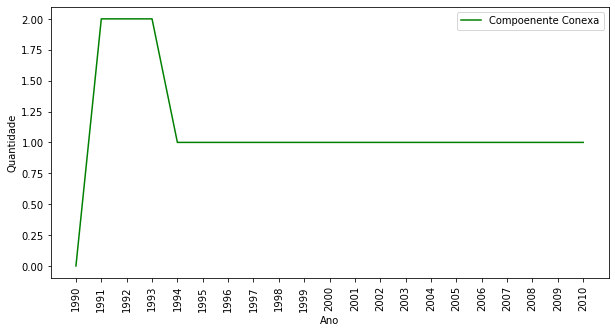

In [663]:
#Todos compartilham a mesma rota ao longo dos anos
from networkx.algorithms.components import number_connected_components
cc_ = []
x_ = []
ano = 1990
for graph in graph_by_year:
    cc_.append(number_connected_components(graph))
    x_.append(ano)
    ano = ano+1
    
import datetime
fig, ax = plt.subplots(figsize=(10,5))

#create xticks
xticks = pd.date_range(datetime.datetime(1990,1,1), datetime.datetime(2020,1,1), freq='YS')
ax.set_xticklabels([x.strftime('%Y') for x in xticks])
ax.set_xticks((x_))
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
plt.xticks(rotation=90)
plt.plot(x_,cc_,'-g',label = 'Compoenente Conexa')
plt.legend(loc="upper right")
plt.show()

### Métricas

Métricas extraídas do ultimo ano da base

In [664]:
G = graph_by_year[-1]
GraphList.append(G)

#### Métricas gerais

Quantidade de nós e arestas

In [665]:
print("Quantidade de nós:", len(G.nodes))
print("Quantidade de arestas:", len(G.edges))

Quantidade de nós: 751
Quantidade de arestas: 1714


Quantidade de componentes conexas

In [666]:
from networkx.algorithms.components import number_connected_components
print(number_connected_components(G))

1


Métricas relativas ao grau dos vértices

In [667]:
degrees = []
for n, d in G.degree():
    degrees.append(d)

from statistics import  *
number_of_nodes = G.number_of_nodes()
maxi =max(d for n, d in G.degree()) 
mini =min(d for n, d in G.degree()) 
median =median(d for n, d in G.degree()) 

std = stdev(degrees) 
mean = sum(degrees) / float(number_of_nodes)
print("#nodes: ",number_of_nodes)
print("max: ",maxi )
print("min: ",mini )
print("mean: ",mean )
print("median: ",median )
print("std: ",std )


#nodes:  751
max:  436
min:  1
mean:  4.564580559254328
median:  2
std:  23.688945884606916


[3, 253, 5, 94, 436, 2, 205, 1, 1, 1, 2, 184, 1, 3, 55, 7, 71, 5, 2, 5, 72, 4, 1, 3, 3, 2, 2, 270, 4, 2, 1, 2, 7, 2, 2, 2, 1, 4, 74, 4, 2, 2, 5, 3, 2, 4, 1, 3, 2, 3, 1, 2, 1, 2, 2, 5, 1, 1, 9, 6, 4, 3, 4, 1, 5, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 2, 9, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 2, 3, 2, 4, 3, 2, 1, 2, 2, 4, 2, 5, 1, 2, 2, 3, 9, 5, 2, 4, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 10, 1, 2, 3, 1, 5, 2, 2, 5, 3, 2, 4, 4, 2, 1, 9, 2, 1, 7, 3, 6, 1, 1, 4, 4, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 7, 2, 1, 2, 3, 4, 3, 2, 1, 2, 2, 1, 5, 2, 2, 2, 4, 2, 2, 3, 2, 1, 3, 3, 2, 1, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 2, 6, 8, 1, 2, 2, 1, 4, 1, 2, 4, 2, 1, 1, 5, 1, 4, 2, 1, 2, 4, 1, 1, 1, 3, 2, 4, 3, 3, 2, 1, 2, 6, 1, 1, 5, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 10, 1, 3, 3, 1, 6, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 2, 3, 2, 2, 1, 1, 2, 3, 1, 1, 10, 3, 2, 3, 1, 1, 1, 3, 2, 1, 6, 1, 3, 1, 6, 1, 5, 2, 3, 2, 5, 1, 5, 4, 5, 2, 1, 1, 1, 1, 

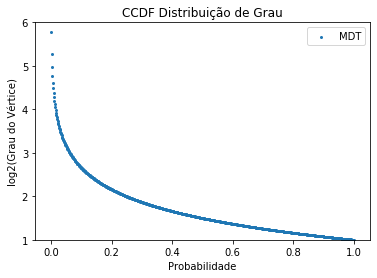

In [668]:
import math
data = list(dict(G.degree()).values())
data_sorted = sorted(data)
print(data)
cdf = 1. * np.arange(len(data)) / (len(data) - 1)
# plot the sorted data:
ccdf = 1-cdf
# encontra o logaritmo CCDF and ylabels
logcdfy = [-math.log2(1.0 - (float(idx) / len(data_sorted)))
           for idx in range(len(data_sorted))]

# encontra o logaritmo da probabilidade and xlabels
logcdfx = [-math.log2(1.0 - (float(idx) / len(ccdf)))
           for idx in range(len(ccdf))]

labels = ['1', '2', '3', '4', '5', '6', '7', '8','9']
labels = labels[0:math.ceil(max(logcdfy))+1]
print("labels: ", labels)
# plot CCDF
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(ccdf, logcdfy, s=4, linewidths=1,label="MDT")

axes.set_ylim(0, math.ceil(max(logcdfy)))
axes.set_yticklabels(labels)
plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.show()


Métricas relativas a densidade da rede

In [669]:
S = [G.subgraph(c).copy()for c in nx.connected_components(G)]
# nx.draw(S[0], node_color='r', edge_color='b',with_labels=True)

                                                     Densidade 
![image.png](densidade.png)

In [670]:
#Para cada componente conexa se calcula a densidade
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max(density(s),maxi)
    mini = min(density(s),mini)
    densities.append(density(s))
densities = sorted(densities)
if(len(densities)%2 == 0):
    median = densities[int(len(densities)/2)]+densities[int(len(densities)/2 + 1)]/2
else:
    median = densities[ int(len(densities)/2 )]
try:
    std = stdev(densities) 
except:
    std = 0
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", density(G))
print("median: ", median)
print("standart deviation: ", std)

Max:  0.006086107412339103
Min:  0.006086107412339103
mean:  0.006086107412339103
median:  0.006086107412339103
standart deviation:  0


In [671]:
from networkx.classes.function import *
density(G)

0.006086107412339103

#### Métricas de centralidade

In [672]:
from networkx.algorithms.centrality import *

#####  Grau

In [673]:
S = list({k: v for k, v in sorted(degree_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.5813333333333334
Min:  0.0013333333333333333
mean:  0.006086107412339113
median:  0.0026666666666666666
standart deviation:  0.03158526117947589


##### Betwenness

In [674]:
S = list({k: v for k, v in sorted(betweenness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.51704461641685
Min:  0.0
mean:  0.0024350905512720926
median:  0.0001349361987184352
standart deviation:  0.023770801964506347


#####  Closeness

In [675]:
S = list({k: v for k, v in sorted(closeness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.547845142439737
Min:  0.2604166666666667
mean:  0.3621487298501764
median:  0.35410764872521244
standart deviation:  0.05497731578849542


##### Eigen Vector

In [676]:
S = list({k: v for k, v in sorted(eigenvector_centrality(G,max_iter=150).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.4560003522042325
Min:  0.002667880276185254
mean:  0.02478923820912951
median:  0.01999186034814042
standart deviation:  0.02679566495852845


##### PageRank

In [677]:
from networkx.algorithms.link_analysis.pagerank_alg import *
S = list({k: v for k, v in sorted(pagerank(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.1308755088684738
Min:  0.0003908433578657974
mean:  0.0013315579227696417
median:  0.0006749823283352356
standart deviation:  0.006668523872744445


### Criação dos nós para a ferramenta Gelphi

Criacao dos nós da rede

In [678]:
G = graph_by_year[-1]

In [679]:
df_aux_1 = pd.DataFrame(df['Code'].unique(),columns={"Node"})
df_aux_1['label'] = df_aux_1['Node'].astype(str)+'_zipcode'

In [680]:
df_aux_2 = pd.DataFrame(df['State'].unique(),columns={"Node"})
df_aux_2['label'] = df_aux_1['Node'].astype(str)+'_state'

In [681]:
df_aux_3 = pd.DataFrame( list(df.columns)[3:],columns={"Node"})
df_aux_3['label'] = df_aux_3['Node']

In [682]:
df = pd.concat([df_aux_1,df_aux_2,df_aux_3])

In [683]:
df.rename(columns={"Node":"Id"},inplace=True)

In [684]:
df.to_csv("Node_Mexico_last_year.csv",index=False)

In [685]:
df_edges = pd.DataFrame(list(G.edges),columns=['Source','Target'])

In [686]:
df_edges.to_csv("drug_last_year.csv",index=False)

In [687]:
df['Id'].value_counts()

20479    1
26043    1
26050    1
26049    1
26048    1
        ..
7057     1
7056     1
7055     1
7054     1
20480    1
Name: Id, Length: 2499, dtype: int64

In [688]:
len(G.edges)

1714

Para cada métrica analisada, calcule as seguintes estatísticas: máximo, mínimo, média,
mediana, desvio padrão, e distribuição empírica (faça um gráfico com as diferentes redes). 

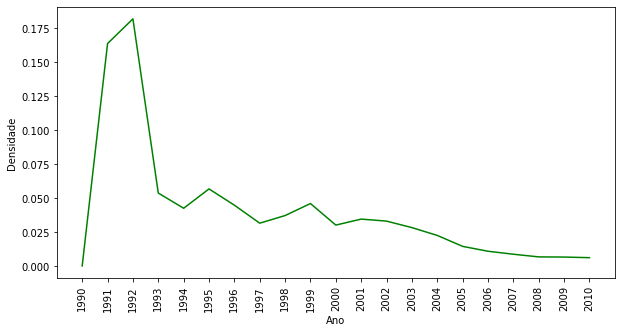

In [689]:
from networkx.classes.function import *
density_ = []
x_ = []
ano = 1990
for graph in graph_by_year:
    density_.append(density(graph))
    x_.append(ano)
    ano = ano + 1
import datetime    
fig, ax = plt.subplots(figsize=(10,5))

#create xticks
xticks = pd.date_range(datetime.datetime(1990,1,1), datetime.datetime(2020,1,1), freq='YS')
ax.set_xticklabels([x.strftime('%Y') for x in xticks])
ax.set_xticks((x_))
ax.set_xlabel('Ano')
ax.set_ylabel('Densidade')
plt.xticks(rotation=90)
plt.plot(x_,density_,'-g')

plt.show()

## Rede 3: Italian gangs

### Leitura das tabelas

In [690]:
df_country = pd.read_csv("T1/ItalianGangs/CSV/ITALIAN_GANGS_ATTR.csv")

In [691]:
df_gang = pd.read_csv("T1/ItalianGangs/CSV/ITALIAN_GANGS.csv")

In [692]:
df_gang.rename(columns={"Unnamed: 0":"pessoa"},inplace=True)
df_country.rename(columns={"Unnamed: 0":"pessoa"},inplace=True)

In [693]:
df_gang.sample(3)

,pessoa,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N58,N59,N60,N61,N62,N63,N64,N65,N66,N67
48,N49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,N57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
28,N29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [694]:
df_country.sample(3)

,pessoa,country
6,N7,3
30,N31,4
40,N41,3


### Construção do Grafo

In [695]:
def add_edge(df):
    lista = df.values.tolist()
    for idx in range(len(lista)):
        gang = lista[idx]
        
        for i in range( 1,len(gang) ):
            if(gang[i] == 1):
                if(gang[0] != df.columns[i]):
                    print("Adicionou aresta: <{},{}> ".format(gang[0],df.columns[i]) )
                    G.add_edge(gang[0],df.columns[i])
def add_edge_country(df):
    lista = df.values.tolist()
    for idx in range(len(lista)):
        gang = lista[idx]
        
        for i in range( 1,len(gang) ):
            print("Adicionou aresta: <{},{}> ".format(gang[0],df.columns[i]+"_"+str(gang[i])) )
            G.add_edge(gang[0],df.columns[i]+"_"+str(gang[i]))

In [696]:
G = nx.Graph()

add_edge(df_gang)
add_edge_country(df_country)
GraphList.append(G)

Adicionou aresta: <N1,N4> 
Adicionou aresta: <N1,N25> 
Adicionou aresta: <N2,N46> 
Adicionou aresta: <N3,N39> 
Adicionou aresta: <N4,N1> 
Adicionou aresta: <N4,N11> 
Adicionou aresta: <N4,N12> 
Adicionou aresta: <N4,N18> 
Adicionou aresta: <N4,N19> 
Adicionou aresta: <N4,N23> 
Adicionou aresta: <N4,N24> 
Adicionou aresta: <N4,N25> 
Adicionou aresta: <N4,N26> 
Adicionou aresta: <N4,N56> 
Adicionou aresta: <N4,N59> 
Adicionou aresta: <N5,N18> 
Adicionou aresta: <N6,N9> 
Adicionou aresta: <N6,N19> 
Adicionou aresta: <N7,N47> 
Adicionou aresta: <N7,N63> 
Adicionou aresta: <N8,N47> 
Adicionou aresta: <N8,N58> 
Adicionou aresta: <N8,N63> 
Adicionou aresta: <N9,N6> 
Adicionou aresta: <N9,N19> 
Adicionou aresta: <N9,N23> 
Adicionou aresta: <N9,N34> 
Adicionou aresta: <N10,N32> 
Adicionou aresta: <N10,N47> 
Adicionou aresta: <N10,N66> 
Adicionou aresta: <N11,N4> 
Adicionou aresta: <N11,N18> 
Adicionou aresta: <N11,N19> 
Adicionou aresta: <N11,N24> 
Adicionou aresta: <N11,N36> 
Adicionou aresta:

### Criação do arquivo utilizado para a ferramenta Gelphi

#### Criação dos nós para a ferramenta Gelphi

#### Criação das arestas para a ferramenta Gelphi

### Métricas

#### Métricas gerais

Quantidade de nós e arestas

In [697]:
print("Quantidade de nós:", len(G.nodes))
print("Quantidade de arestas:", len(G.edges))

Quantidade de nós: 76
Quantidade de arestas: 181


Quantidade de componentes conexas

In [698]:
from networkx.algorithms.components import number_connected_components
print(number_connected_components(G))

1


Métricas relativas ao grau dos vértices

In [699]:

degrees = []
for n, d in G.degree():
    degrees.append(d)

from statistics import  *
number_of_nodes = G.number_of_nodes()
maxi =max(d for n, d in G.degree()) 
mini =min(d for n, d in G.degree()) 
median =median(d for n, d in G.degree()) 

std = stdev(degrees) 
mean = sum(degrees) / float(number_of_nodes)
print("#nodes: ",number_of_nodes)
print("max: ",maxi )
print("min: ",mini )
print("mean: ",mean )
print("median: ",median )
print("std: ",std )


#nodes:  76
max:  22
min:  1
mean:  4.7631578947368425
median:  3.0
std:  4.85762197253658


[3, 12, 3, 2, 2, 2, 6, 10, 5, 19, 22, 4, 5, 2, 2, 4, 2, 3, 5, 3, 11, 20, 4, 6, 2, 4, 6, 2, 2, 4, 3, 2, 7, 4, 3, 7, 6, 4, 3, 2, 3, 5, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 6, 5, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 3, 5, 1, 15, 20, 21, 2, 1, 1, 1]
labels:  ['1', '2', '3', '4', '5', '6', '7', '8']


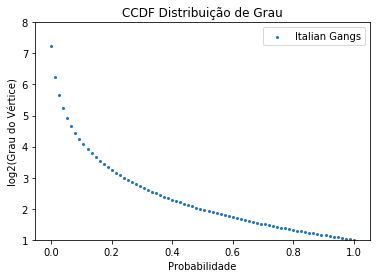

In [700]:
import math
data = list(dict(G.degree()).values())
data_sorted = sorted(data)
print(data)
cdf = 1. * np.arange(len(data)) / (len(data) - 1)
# plot the sorted data:
ccdf = 1-cdf
# encontra o logaritmo CCDF and ylabels
logcdfy = [-math.log2(1.0 - (float(idx) / len(data_sorted)))
           for idx in range(len(data_sorted))]

# encontra o logaritmo da probabilidade and xlabels
logcdfx = [-math.log2(1.0 - (float(idx) / len(ccdf)))
           for idx in range(len(ccdf))]

labels = ['1', '2', '3', '4', '5', '6', '7', '8','9']
labels = labels[0:math.ceil(max(logcdfy))+1]
print("labels: ", labels)
# plot CCDF
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(ccdf, logcdfy, s=4, linewidths=1,label="Italian Gangs")

axes.set_ylim(0, math.ceil(max(logcdfy)))
axes.set_yticklabels(labels)
plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.show()


Métricas relativas a densidade da rede

                                                     Densidade 
![image.png](densidade.png)

In [701]:
S = [G.subgraph(c).copy()for c in nx.connected_components(G)]
# nx.draw(S[0], node_color='r', edge_color='b',with_labels=True)

In [702]:
#Para cada componente conexa se calcula a densidade
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max(density(s),maxi)
    mini = min(density(s),mini)
    densities.append(density(s))
densities = sorted(densities)
if(len(densities)%2 == 0):
    median = densities[int(len(densities)/2)]+densities[int(len(densities)/2 + 1)]/2
else:
    median = densities[ int(len(densities)/2 )]
try:
    std = stdev(densities) 
except:
    std = 0
mean = sum(densities)/len(densities)
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.06350877192982456
Min:  0.06350877192982456
mean:  0.06350877192982456
median:  0.06350877192982456
standart deviation:  0


In [703]:
from networkx.classes.function import *
density(G)

0.06350877192982456

#### Métricas de centralidade

In [704]:
from networkx.algorithms.centrality import *

#####  Grau

In [705]:
S = list({k: v for k, v in sorted(degree_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.29333333333333333
Min:  0.013333333333333334
mean:  0.06350877192982457
median:  0.06
standart deviation:  0.0647682929671544


##### Betwenness

In [706]:
S = list({k: v for k, v in sorted(betweenness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)


Max:  0.29444742930037066
Min:  0.0
mean:  0.024698909435751547
median:  0.0035058888294182407
standart deviation:  0.05287636077579194


#####  Closeness

In [707]:
S = list({k: v for k, v in sorted(closeness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.5319148936170213
Min:  0.21676300578034682
mean:  0.36206349965744866
median:  0.5417363433667781
standart deviation:  0.054042676970712626


##### Eigen Vector

In [708]:
S = list({k: v for k, v in sorted(eigenvector_centrality(G,max_iter=150).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.3451321439592632
Min:  0.0009070535236678064
mean:  0.09112584380258623
median:  0.10953739631084153
standart deviation:  0.07013340858072001


##### PageRank

In [709]:
from networkx.algorithms.link_analysis.pagerank_alg import *
S = list({k: v for k, v in sorted(pagerank(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)



Max:  0.05470200538538973
Min:  0.004694433667731044
mean:  0.013157894736842101
median:  0.013250947495475295
standart deviation:  0.011662096990202608


## Rede 4:  Hartford drugnet

Rede coletada: https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/drugnet .

Paper: https://link.springer.com/article/10.1023%2FA%3A1015457400897?LI=true

### Leitura das tabelas

In [710]:
df_drug_users = pd.read_csv("T1/Drugnet/CSV/DRUGNET.csv")

In [711]:
df_drug_users.rename(columns={'Unnamed: 0':"pessoa"},inplace=True)

In [712]:
df_drug_users_attr = pd.read_csv("T1/Drugnet/CSV/DRUGATTR.csv")
df_drug_users_attr.rename(columns={'Unnamed: 0':"pessoa"},inplace=True)

In [713]:
df_drug_users.sample(3)

,pessoa,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
192,195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [714]:
df_drug_users_attr.sample(3)

,pessoa,Ethnicity,Gender,HasTie
266,272,7,2,0
186,189,3,1,1
38,39,3,1,1


### Construção do Grafo

In [715]:
def add_edge(df):
    lista = df.values.tolist()
    for idx in range(len(lista)):
        gang = lista[idx]
        
        for i in range( 1,len(gang) ):
            if(gang[i] == 1):
                print("Adicionou aresta: <{},{}> ".format(gang[0],df.columns[i]) )
                G.add_edge(gang[0],df.columns[i])
def add_node(df):
    lista = df.values.tolist()
    for idx in range(len(lista)):
        pessoa = lista[idx]
        attr = {'etinia':pessoa[1],'genero':pessoa[2]}
        G.add_node(pessoa[0],**attr)
#         print(pessoa[0],attr)
        
    

In [716]:
G = nx.Graph()
add_node(df_drug_users_attr)
add_edge(df_drug_users)
G = G.to_undirected()
GraphList.append(G)

Adicionou aresta: <1,2> 
Adicionou aresta: <1,10> 
Adicionou aresta: <2,1> 
Adicionou aresta: <2,10> 
Adicionou aresta: <3,7> 
Adicionou aresta: <4,7> 
Adicionou aresta: <4,211> 
Adicionou aresta: <5,134> 
Adicionou aresta: <6,152> 
Adicionou aresta: <7,3> 
Adicionou aresta: <7,4> 
Adicionou aresta: <7,9> 
Adicionou aresta: <8,107> 
Adicionou aresta: <8,117> 
Adicionou aresta: <9,1> 
Adicionou aresta: <9,2> 
Adicionou aresta: <9,7> 
Adicionou aresta: <10,1> 
Adicionou aresta: <10,2> 
Adicionou aresta: <11,135> 
Adicionou aresta: <11,220> 
Adicionou aresta: <12,89> 
Adicionou aresta: <13,216> 
Adicionou aresta: <14,24> 
Adicionou aresta: <14,52> 
Adicionou aresta: <16,10> 
Adicionou aresta: <16,19> 
Adicionou aresta: <17,64> 
Adicionou aresta: <17,79> 
Adicionou aresta: <18,55> 
Adicionou aresta: <18,104> 
Adicionou aresta: <18,165> 
Adicionou aresta: <19,18> 
Adicionou aresta: <20,64> 
Adicionou aresta: <20,182> 
Adicionou aresta: <21,16> 
Adicionou aresta: <21,22> 
Adicionou aresta: <

### Criação do arquivo utilizado para a ferramenta Gelphi

#### Criação dos nós para a ferramenta Gelphi

#### Criação das arestas para a ferramenta Gelphi

### Métricas

#### Métricas gerais

Quantidade de nós e arestas

In [717]:
print("Quantidade de nós:", len(G.nodes))
print("Quantidade de arestas:", len(G.edges))

Quantidade de nós: 445
Quantidade de arestas: 337


Quantidade de componentes conexas

In [718]:
from networkx.algorithms.components import number_connected_components
print(number_connected_components(G))

145


Grau médio dos vértices

Métricas relativas ao grau dos vértices

In [719]:
degrees = []
for n, d in G.degree():
    degrees.append(d)

from statistics import  *
number_of_nodes = G.number_of_nodes()
maxi =max(d for n, d in G.degree()) 
mini =min(d for n, d in G.degree()) 
median =median(d for n, d in G.degree()) 

std = stdev(degrees) 
mean = sum(degrees) / float(number_of_nodes)
print("#nodes: ",number_of_nodes)
print("max: ",maxi )
print("min: ",mini )
print("mean: ",mean )
print("std: ",std )
print("median: ",median )



#nodes:  445
max:  10
min:  0
mean:  1.5146067415730338
std:  1.4986142669565174
median:  1


[2, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 3, 3, 3, 0, 0, 1, 1, 1, 1, 5, 2, 0, 2, 2, 2, 3, 3, 0, 1, 0, 2, 3, 0, 1, 2, 0, 1, 5, 5, 0, 2, 0, 2, 5, 2, 2, 5, 1, 0, 0, 0, 1, 4, 0, 4, 3, 1, 0, 2, 1, 0, 0, 3, 2, 2, 1, 2, 0, 2, 0, 5, 3, 2, 0, 0, 2, 0, 1, 2, 1, 3, 0, 3, 1, 2, 2, 1, 0, 1, 1, 0, 2, 3, 0, 1, 3, 2, 0, 0, 3, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 4, 2, 4, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 3, 4, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2, 4, 4, 2, 0, 0, 1, 0, 2, 3, 0, 2, 1, 1, 1, 1, 0, 0, 3, 2, 0, 2, 1, 0, 2, 4, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 4, 4, 3, 3, 1, 3, 2, 3, 3, 1, 4, 4, 1, 4, 2, 1, 2, 1, 3, 8, 1, 3, 4, 5, 2, 3, 1, 5, 1, 4, 2, 4, 5, 4, 1, 2, 1, 1, 5, 4, 

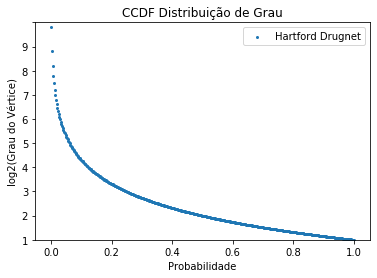

In [720]:
import math
data = list(dict(G.degree()).values())
data_sorted = sorted(data)
print(data)
cdf = 1. * np.arange(len(data)) / (len(data) - 1)
# plot the sorted data:
ccdf = 1-cdf
# encontra o logaritmo CCDF and ylabels
logcdfy = [-math.log2(1.0 - (float(idx) / len(data_sorted)))
           for idx in range(len(data_sorted))]

# encontra o logaritmo da probabilidade and xlabels
logcdfx = [-math.log2(1.0 - (float(idx) / len(ccdf)))
           for idx in range(len(ccdf))]

labels = ['1', '2', '3', '4', '5', '6', '7', '8','9']
labels = labels[0:math.ceil(max(logcdfy))+1]
print("labels: ", labels)
# plot CCDF
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(ccdf, logcdfy, s=4, linewidths=1,label="Hartford Drugnet")

axes.set_ylim(0, math.ceil(max(logcdfy)))
axes.set_yticklabels(labels)
plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.show()


Métricas relativas a densidade da rede

                                                     Densidade 
![image.png](densidade.png)

In [721]:
S = [G.subgraph(c).copy()for c in nx.connected_components(G)]
# nx.draw(S[0], node_color='r', edge_color='b',with_labels=True)
#Para cada componente conexa se calcula a densidade
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max(density(s),maxi)
    mini = min(density(s),mini)
    densities.append(density(s))
densities = sorted(densities)
mean = density(G)
if(len(densities)%2 == 0):
    median = densities[int(len(densities)/2)]+densities[int(len(densities)/2 + 1)]/2
else:
    median = densities[ int(len(densities)/2 )]
try:
    std = stdev(densities) 
except:
    std = 0
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  1.0
Min:  0
mean:  0.0034112764449843102
median:  0
standart deviation:  0.38356659175070934


In [722]:
from networkx.classes.function import *
density(G)

0.0034112764449843102

#### Métricas de centralidade

In [723]:
from networkx.algorithms.centrality import *

#####  Grau

In [724]:
S = list({k: v for k, v in sorted(degree_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.02252252252252252
Min:  0.0
mean:  0.003411276444984301
median:  0.0022522522522522522
standart deviation:  0.003375257358010174


##### Betwenness

In [725]:
S = list({k: v for k, v in sorted(betweenness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)


Max:  0.04857953641149765
Min:  0.0
mean:  0.0020865794396623515
median:  0.0
standart deviation:  0.0049033018444422215


#####  Closeness

In [726]:
S = list({k: v for k, v in sorted(closeness_centrality(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.07905982905982906
Min:  0.0
mean:  0.025380892455702412
median:  0.029029371837591016
standart deviation:  0.02327435988557496


##### Eigen Vector

In [727]:
S = list({k: v for k, v in sorted(eigenvector_centrality(G,max_iter=150).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)




Max:  0.43942200494163014
Min:  1.375261155345997e-87
mean:  0.014703793815502854
median:  3.857838406633654e-06
standart deviation:  0.04511722242392274


##### PageRank

In [728]:
from networkx.algorithms.link_analysis.pagerank_alg import *
S = list({k: v for k, v in sorted(pagerank(G).items(), key=lambda item: item[1],reverse=True)}.values())
maxi = -3
mini = 2
densities = []
for s in S:
    maxi = max((s),maxi)
    mini = min((s),mini)
S = sorted(S)
if(len(S)%2 == 0):
    median = S[int(len(S)/2)]+S[int(len(S)/2 + 1)]/2
else:
    median = S[ int(len(S)/2 )]
mean = sum(S)/len(S)
std = stdev(S) 
print("Max: ", maxi)
print("Min: ", mini)
print("mean: ", mean)
print("median: ", median)
print("standart deviation: ", std)

Max:  0.010075817123925463
Min:  0.00042366897330885467
mean:  0.0022471910112359566
median:  0.0021767951619445446
standart deviation:  0.0015779942061196713


## Distribuição 

Com normalização log-linear

In [876]:
import math
data_plot_x = []
data_plot_y = []
labels_y = []
for graph in GraphList:
    data = list(dict(graph.degree()).values())
    data_sorted = sorted(data)
#     print(data)
    cdf = 1. * np.arange(len(data)) / (len(data) - 1)
    # plot the sorted data:
    ccdf = 1-cdf
    # encontra o logaritmo CCDF e ylabels
    logcdfy = [-math.log2(1.0 - (float(idx) / len(data_sorted)))
               for idx in range(len(data_sorted))]

    # encontra o logaritmo da probabilidade and xlabels
    logcdfx = [-math.log2(1.0 - (float(idx) / len(ccdf)))
               for idx in range(len(ccdf))]

    labels = ['1', '2', '3', '4', '5', '6', '7', '8','9']
    labels = labels[0:math.ceil(max(logcdfy))+1]
    labels_y.append(labels)
    # plot CCDF
    data_plot_x.append(ccdf)
    data_plot_y.append(logcdfy)


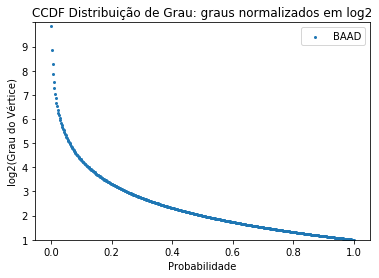

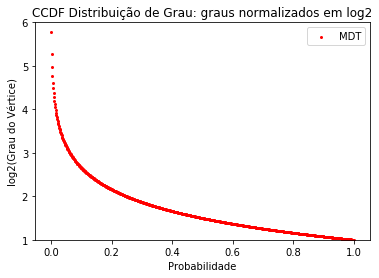

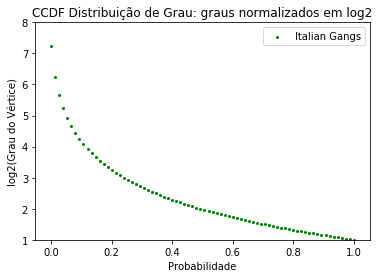

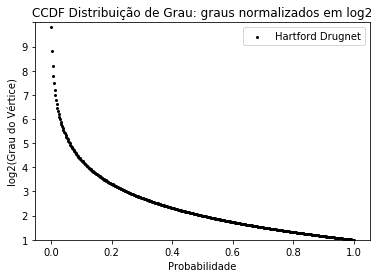

In [877]:
import math
data_plot_x = []
data_plot_y = []
labels_y = []
for graph in GraphList:
    data = list(dict(graph.degree()).values())
    data_sorted = sorted(data)
#     print(data)
    cdf = 1. * np.arange(len(data)) / (len(data) - 1)
    # plot the sorted data:
    ccdf = 1-cdf
    # encontra o logaritmo CCDF e ylabels
    logcdfy = [-math.log2(1.0 - (float(idx) / len(data_sorted)))
               for idx in range(len(data_sorted))]

    # encontra o logaritmo da probabilidade and xlabels
    logcdfx = [-math.log2(1.0 - (float(idx) / len(ccdf)))
               for idx in range(len(ccdf))]

    labels = ['1', '2', '3', '4', '5', '6', '7', '8','9']
    labels = labels[0:math.ceil(max(logcdfy))+1]
    labels_y.append(labels)
    # plot CCDF
    data_plot_x.append(ccdf)
    data_plot_y.append(logcdfy)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[0], data_plot_y[0], s=4, linewidths=1,label="BAAD")
axes.set_ylim(0, math.ceil(max(data_plot_y[0])))
axes.set_yticklabels(labels_y[0])

plt.title("CCDF Distribuição de Grau: graus normalizados em log2")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.savefig('normalizado_T1.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[1], data_plot_y[1],marker="o", s=4,color='red', linewidths=1,label="MDT")
axes.set_ylim(0, math.ceil(max(data_plot_y[1])))
axes.set_yticklabels(labels_y[1])

plt.title("CCDF Distribuição de Grau: graus normalizados em log2")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.savefig('normalizado_T2.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[2], data_plot_y[2], s=4,color='green', linewidths=1,label="Italian Gangs")
axes.set_ylim(0, math.ceil(max(data_plot_y[2])))
axes.set_yticklabels(labels_y[2])

plt.title("CCDF Distribuição de Grau: graus normalizados em log2")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.savefig('normalizado_T3.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[3], data_plot_y[3],marker="o", s=4,color='black', linewidths=1,label="Hartford Drugnet")
axes.set_ylim(0, math.ceil(max(data_plot_y[3])))
axes.set_yticklabels(labels_y[3])

plt.title("CCDF Distribuição de Grau: graus normalizados em log2")
plt.xlabel("Probabilidade")
plt.ylabel("log2(Grau do Vértice)")
plt.legend()
plt.savefig('normalizado_T4.png')


In [849]:
 [-math.log2(1- (float(idx) / len(sorted(list(dict(GraphList[-1].degree()).values())))))
               for idx in range(len(sorted(list(dict(GraphList[-1].degree()).values()))))]


[-0.0,
 0.0032456595036541155,
 0.006498637298741747,
 0.009758966462328461,
 0.01302668029623959,
 0.01630181232910054,
 0.019584396318401937,
 0.022874466252586684,
 0.026172056353161704,
 0.02947720107683369,
 0.03278993511766953,
 0.03611029340928084,
 0.039438311127035226,
 0.04277402369029157,
 0.04611746676466195,
 0.04946867626429977,
 0.05282768835421443,
 0.056194539452613226,
 0.05956926623326977,
 0.06295190562792188,
 0.066342494828696,
 0.0697410712905609,
 0.07314767273381031,
 0.0765623371465749,
 0.07998510278736409,
 0.0834160081876375,
 0.08685509215440852,
 0.09030239377287734,
 0.09375795240909644,
 0.09722180771266789,
 0.10069399961947291,
 0.10417456835443493,
 0.10766355443431479,
 0.11116099867054173,
 0.1146669421720772,
 0.11818142634831402,
 0.12170449291201121,
 0.1252361838822646,
 0.12877654158751312,
 0.1323256086685839,
 0.13588342808177303,
 0.13945004310196532,
 0.14302549732579267,
 0.14660983467483157,
 0.15020309939883988,
 0.15380533607903546,
 0

In [879]:
print(maxi)

436


Com escala log no eixo y

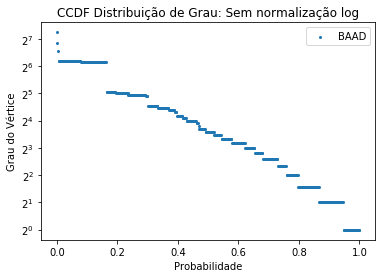

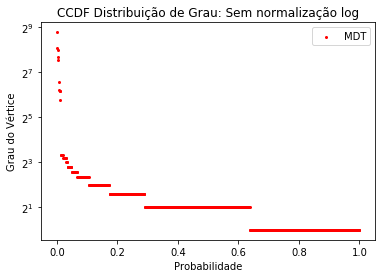

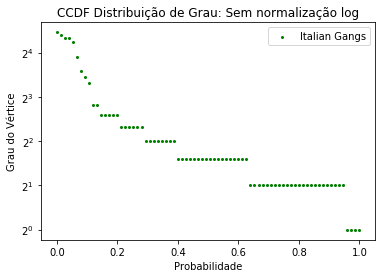

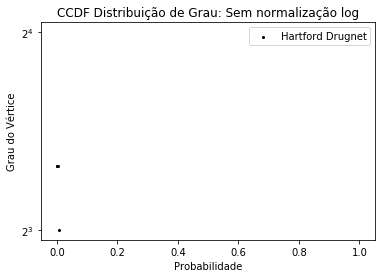

In [880]:
import math
data_plot_x = []
data_plot_y = []
labels_y = []
for graph in GraphList:
    data = list(dict(graph.degree()).values())
    data_sorted = sorted(data)
#     print(data)
    cdf = 1. * np.arange(len(data)) / (len(data) - 1)
    # plot the sorted data:
    ccdf = 1-cdf
    # plot CCDF
    data_plot_x.append(ccdf)
    data_plot_y.append(data_sorted)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[0], data_plot_y[0], s=4, linewidths=1,label="BAAD")
axes.set_yscale('log', basey=2)

plt.title("CCDF Distribuição de Grau: Sem normalização log")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('T1.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[1], data_plot_y[1],marker="o", s=4,color='red', linewidths=1,label="MDT")
axes.set_yscale('log', basey=2)

plt.title("CCDF Distribuição de Grau: Sem normalização log")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('T2.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[2], data_plot_y[2], s=4,color='green', linewidths=1,label="Italian Gangs")
axes.set_yscale('log', basey=2)
plt.title("CCDF Distribuição de Grau: Sem normalização log")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('T3.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[3], data_plot_y[3],marker="o", s=4,color='black', linewidths=1,label="Hartford Drugnet")
axes.set_yscale('log', basey=2)

plt.title("CCDF Distribuição de Grau: Sem normalização log")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('T4.png')


Sem escala

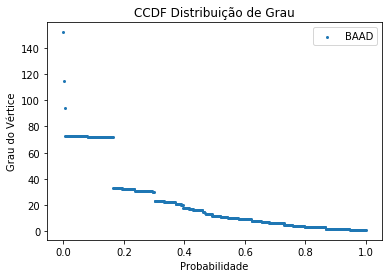

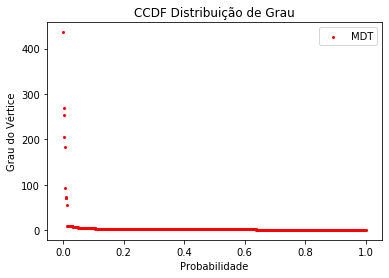

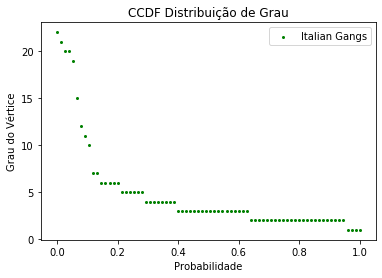

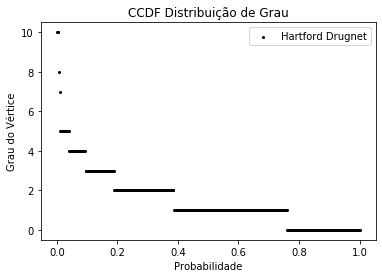

In [881]:
import math
data_plot_x = []
data_plot_y = []
labels_y = []
for graph in GraphList:
    data = list(dict(graph.degree()).values())
    data_sorted = sorted(data)
#     print(data)
    cdf = 1. * np.arange(len(data)) / (len(data) - 1)
    # plot the sorted data:
    ccdf = 1-cdf
    # plot CCDF
    data_plot_x.append(ccdf)
    data_plot_y.append(data_sorted)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[0], data_plot_y[0], s=4, linewidths=1,label="BAAD")


plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('Sem_escala_T1.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[1], data_plot_y[1],marker="o", s=4,color='red', linewidths=1,label="MDT")


plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('Sem_escala_T2.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[2], data_plot_y[2], s=4,color='green', linewidths=1,label="Italian Gangs")

plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('Sem_escala_T3.png')

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.scatter(data_plot_x[3], data_plot_y[3],marker="o", s=4,color='black', linewidths=1,label="Hartford Drugnet")


plt.title("CCDF Distribuição de Grau")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('Sem_escala_T4.png')


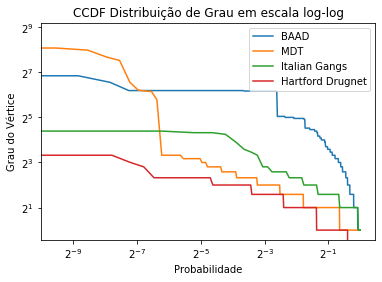

In [918]:
import math
data_plot_x = []
data_plot_y = []
labels_y = []
for graph in GraphList:
    data = list(dict(graph.degree()).values())
    data_sorted = sorted(data)
#     print(data)
    cdf = 1. * np.arange(len(data)) / (len(data) - 1)
    # plot the sorted data:
    ccdf = 1-cdf
    # plot CCDF
    data_plot_x.append(ccdf)
    data_plot_y.append(data_sorted)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
# axes.scatter(data_plot_x[0], data_plot_y[0], s=4, linewidths=1,label="BAAD")

plt.loglog(data_plot_x[0],data_plot_y[0],basex=2,basey=2 ,label="BAAD")
plt.loglog(data_plot_x[1],data_plot_y[1],basex=2,basey=2 ,label="MDT")
plt.loglog(data_plot_x[2],data_plot_y[2],basex=2,basey=2 ,label="Italian Gangs")
plt.loglog(data_plot_x[3],data_plot_y[3],basex=2,basey=2 ,label="Hartford Drugnet")
plt.title("CCDF Distribuição de Grau em escala log-log")
plt.xlabel("Probabilidade")
plt.ylabel("Grau do Vértice")
plt.legend()
plt.savefig('escala_loglog.png')

# fig = plt.figure()
# axes = fig.add_subplot(1, 1, 1)
# axes.scatter(data_plot_x[1], data_plot_y[1],marker="o", s=4,color='red', linewidths=1,label="MDT")


# plt.title("CCDF Distribuição de Grau")
# plt.xlabel("Probabilidade")
# plt.ylabel("Grau do Vértice")
# plt.legend()
# plt.savefig('Sem_escala_T2.png')

# fig = plt.figure()
# axes = fig.add_subplot(1, 1, 1)
# axes.scatter(data_plot_x[2], data_plot_y[2], s=4,color='green', linewidths=1,label="Italian Gangs")

# plt.title("CCDF Distribuição de Grau")
# plt.xlabel("Probabilidade")
# plt.ylabel("Grau do Vértice")
# plt.legend()
# plt.savefig('Sem_escala_T3.png')

# fig = plt.figure()
# axes = fig.add_subplot(1, 1, 1)
# axes.scatter(data_plot_x[3], data_plot_y[3],marker="o", s=4,color='black', linewidths=1,label="Hartford Drugnet")


# plt.title("CCDF Distribuição de Grau")
# plt.xlabel("Probabilidade")
# plt.ylabel("Grau do Vértice")
# plt.legend()
# plt.savefig('Sem_escala_T4.png')
